In [29]:
import numpy as np
import random as rnd
import matplotlib
import matplotlib.pyplot as plt
import time
import pandas as pd

### L = 16  |  Relaxing $10^4$  |  AVG $10^3$ times  |  Every 100 MC-steps

In [30]:
L = 16
t = np.linspace(3.4,3.9,20)
df_e,df_ms,df_mt=[pd.DataFrame(columns=t) for i in range(3)]

for i in range(1,9):
    dfe = pd.read_csv('export/e_at_L16_avg1000_mc10_after1000mc_seed'+str(i)+'.csv')
    dfms = pd.read_csv('export/ms_at_L16_avg1000_mc10_after1000mc_seed'+str(i)+'.csv')
    dfmt = pd.read_csv('export/mt_at_L16_avg1000_mc10_after1000mc_seed'+str(i)+'.csv')
    
    df_e=df_e.append(dfe, ignore_index=True) #append to global dfs
    df_ms=df_ms.append(dfms, ignore_index=True) #append to global dfs
    df_mt=df_mt.append(dfmt, ignore_index=True) #append to global dfs

In [31]:
def calc_U(ms,mt):
    """magnetic susceptibility ver.1"""
    ms2 = np.array(ms)**2   #m^2
    mt2 = np.array(mt)**2
    m2 = ms2+mt2
    return 2*(1-0.5*(np.mean(m2**2))/(np.mean(m2)**2))

U = []
for j in range(8):
    msvals = df_ms.values[1000*j:1000*(j+1)]
    mtvals = df_mt.values[1000*j:1000*(j+1)]
    for i in range(len(t)):
        U += [calc_U(msvals[:,i],mtvals[:,i])]
        
U_np = np.array(U).reshape(8,20)
U_mean, U_std = [],[]
for k in range(20):
    p = U_np[:,k]
    U_mean += [np.mean(p)]
    U_std += [np.std(p)]

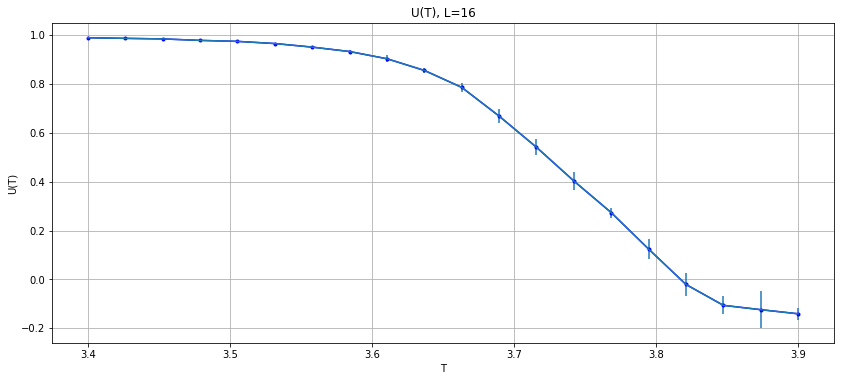

In [34]:
plt.figure(figsize=(14, 20))

plt.subplot(3, 1, 1)

plt.plot(t, U_mean, '.-', c='blue')
plt.errorbar(t, U_mean, yerr=U_std)
plt.title('U(T), L=%d'%(L))
plt.ylabel('U(T)')
plt.xlabel('T')
plt.grid(True)

### L = 32  |  Relaxing $10^4$  |  AVG $10^3$ times  |  Every 100 MC-steps

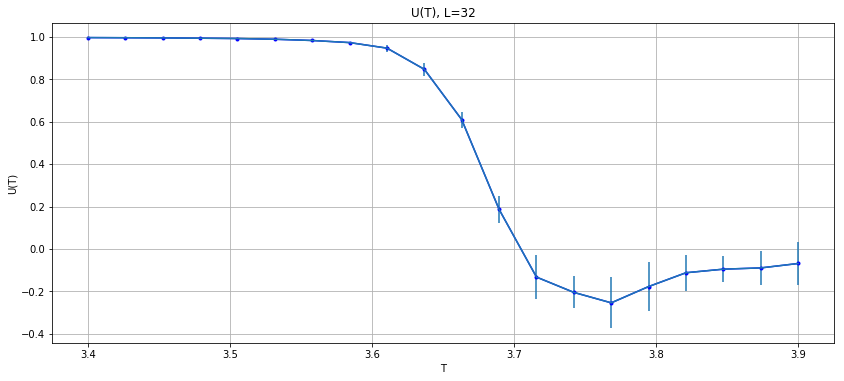

In [36]:
L = 32
t = np.linspace(3.4,3.9,20)
df_e,df_ms,df_mt=[pd.DataFrame(columns=t) for i in range(3)]

for i in range(1,9):
    dfe = pd.read_csv('export2/e_at_L32_avg1000_mc100_after9900mc_seed'+str(i)+'.csv')
    dfms = pd.read_csv('export2/ms_at_L32_avg1000_mc100_after9900mc_seed'+str(i)+'.csv')
    dfmt = pd.read_csv('export2/mt_at_L32_avg1000_mc100_after9900mc_seed'+str(i)+'.csv')
    
    df_e=df_e.append(dfe, ignore_index=True) #append to global dfs
    df_ms=df_ms.append(dfms, ignore_index=True) #append to global dfs
    df_mt=df_mt.append(dfmt, ignore_index=True) #append to global dfs
    
    
U = []
for j in range(8):
    msvals = df_ms.values[1000*j:1000*(j+1)]
    mtvals = df_mt.values[1000*j:1000*(j+1)]
    for i in range(len(t)):
        U += [calc_U(msvals[:,i],mtvals[:,i])]
        
U_np = np.array(U).reshape(8,20)
U_mean, U_std = [],[]
for k in range(20):
    p = U_np[:,k]
    U_mean += [np.mean(p)]
    U_std += [np.std(p)]
    
plt.figure(figsize=(14, 20))


plt.subplot(3, 1, 1)
plt.plot(t, U_mean, '.-', c='blue')
plt.errorbar(t, U_mean, yerr=U_std)
plt.title('U(T), L=%d'%(L))
plt.ylabel('U(T)')
plt.xlabel('T')
plt.grid(True)